<a href="https://colab.research.google.com/github/TAEWOOYOON/SkillTreePython-DeepLearning/blob/main/01.%EB%94%A5%EB%9F%AC%EB%8B%9Dwith%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0-basic/ch01_11_CNN%EC%8B%A4%EC%A0%84_%EB%9E%9C%EB%93%9C%EB%A7%88%ED%81%AC%EC%9D%B4%EB%AF%B8%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch01.11 CNN실전 - 랜드마크 이미지

* 날짜:
* 이름:

## 학습내용
    - 랜드마크 데이터를 이용한 적절한 모델을 구축 및 학습한다.

### 소개

인공지능 기반의 컴퓨터 비전 기술 및 서비스 개발에 활용하기 위해 국내 특성(지리 공간적, 기능적)이 반영된 국내 도심 민간건물, 공공기관, 관광명소, 편의시설 등 국내 도시별 주요 랜드마크 이미지 데이터 구축

### 구축목적
AI 기술 및 응용서비스 개발에 활용가치가 높은 인공지능 학습용 데이터 구축 및 개방, AI응용 서비스 개발
국내 특성(지리 공간적, 기능적)이 반영된 국내 도심 민간건물, 공공기관, 관광명소, 편의시설 등 국내 도시별 주요 랜드마크 이미지 데이터 구축

### AI허브 링크
https://aihub.or.kr/aihubdata/data/view.do?currMenu=115&topMenu=100&aihubDataSe=realm&dataSetSn=56

## 실습
---

#### **데이터로드**
```
! gdown https://drive.google.com/u/0/uc?id=19vsxVITy277RfMTmnY3qE6mH_DOZK7pt&export=download
```

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! gdown https://drive.google.com/u/0/uc?id=19vsxVITy277RfMTmnY3qE6mH_DOZK7pt&export=download

Downloading...
From: https://drive.google.com/u/0/uc?id=19vsxVITy277RfMTmnY3qE6mH_DOZK7pt
To: /content/jejudo.zip
100% 4.35G/4.35G [00:22<00:00, 195MB/s]


In [3]:
! unzip '/content/jejudo.zip'

Archive:  /content/jejudo.zip
   creating: 골드원호텔&스위트/
  inflating: 골드원호텔&스위트/골든원 호텔&스위트_060_41961619.jpg  
  inflating: 골드원호텔&스위트/골든원 호텔&스위트_061_41961623.jpg  
  inflating: 골드원호텔&스위트/골든원 호텔&스위트_062_41961624.jpg  
  inflating: 골드원호텔&스위트/골든원 호텔&스위트_063_41961625.jpg  
  inflating: 골드원호텔&스위트/골든원 호텔&스위트_064_41961628.jpg  
  inflating: 골드원호텔&스위트/골든원 호텔&스위트_066_41961631.jpg  
  inflating: 골드원호텔&스위트/골든원 호텔&스위트_067_41961636.jpg  
  inflating: 골드원호텔&스위트/골든원 호텔&스위트_068_41961637.jpg  
  inflating: 골드원호텔&스위트/골든원 호텔&스위트_069_41961638.jpg  
  inflating: 골드원호텔&스위트/골든원 호텔&스위트_070_41961640.jpg  
  inflating: 골드원호텔&스위트/골든원 호텔&스위트_071_41961641.jpg  
  inflating: 골드원호텔&스위트/골든원 호텔&스위트_073_41961649.jpg  
  inflating: 골드원호텔&스위트/골든원 호텔&스위트_074_41961654.jpg  
  inflating: 골드원호텔&스위트/골든원 호텔&스위트_075_41961655.jpg  
  inflating: 골드원호텔&스위트/골든원 호텔&스위트_076_41961656.jpg  
  inflating: 골드원호텔&스위트/골든원 호텔&스위트_077_41961657.jpg  
  inflating: 골드원호텔&스위트/골든원 호텔&스위트_078_41961659.jpg  
  inflating: 골드원호텔&스위트/골든원 호텔&스위트_079_4196166

In [22]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
# 제주도에 8개 관광지를 맞추는 모델

In [24]:
train_gen = ImageDataGenerator(rescale = 1.0/255.0 , # 0~1로 스케일링
                               validation_split = 0.2,
                               width_shift_range = 0.25,
                               height_shift_range = 0.25,
                               rotation_range = 180,
                               shear_range = 0.2,
                               zoom_range = 0.2, 
                               horizontal_flip = True,
                               vertical_flip = True,
                               brightness_range = [0.6, 1.4])
valid_gen = ImageDataGenerator(rescale = 1.0/255.0 , # 0~1로 스케일링
                               validation_split = 0.2,
                                width_shift_range = 0.25,
                               height_shift_range = 0.25,
                               rotation_range = 180,
                               shear_range = 0.2,
                               zoom_range = 0.2, 
                               horizontal_flip = True,
                               vertical_flip = True,
                               brightness_range = [0.6, 1.4])

In [ ]:
import os
os.mkdir('dataset')

In [26]:
dir_path = '/content/dataset'
BATCH_SIZE = 8
IMG_SHAPE = (180, 180)
SEED = 123
# 같은 디렉토리에서 train-valid 나누기

train_ds = train_gen.flow_from_directory(dir_path,
                                         target_size = IMG_SHAPE,
                                         batch_size = BATCH_SIZE,
                                         class_mode = 'categorical',
                                         subset = 'training', # validation or training 무엇으로 나눌것인지
                                         seed = SEED, # 랜덤하게 split 되기 때문에 시드값 설정 해줘야 일정한 값 생성
                                         )

valid_ds = valid_gen.flow_from_directory(dir_path,
                                         target_size = IMG_SHAPE,
                                         batch_size = BATCH_SIZE,
                                         class_mode = 'categorical',
                                         subset = 'validation',
                                         seed = SEED,
                                         )

Found 1065 images belonging to 8 classes.
Found 263 images belonging to 8 classes.


(8, 180, 180, 3) (8, 8)


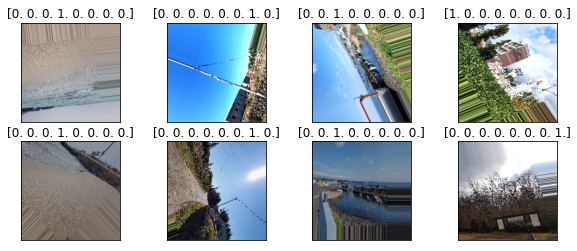

In [50]:
import matplotlib.pyplot as plt

# imgs (batch size, 180,180,3)
# labels 원 핫인코딩이 되어 있다.
plt.figure(figsize = (10,4))
for imgs, labels in train_ds :
  print(imgs.shape, labels.shape)
  for i in range(BATCH_SIZE) :
    plt.subplot(2,4,i+1)
    plt.xticks([]);plt.yticks([])
    plt.title(f'{labels[i]}')
    plt.imshow(imgs[i])
  break

In [28]:
base_model = tf.keras.applications.EfficientNetB7(weights = 'imagenet',
                                                  include_top = False,
                                                  input_shape = IMG_SHAPE+(3,))
base_model.summary()

Model: "efficientnetb7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 180, 180, 3)  0           ['input_3[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 180, 180, 3)  7          ['rescaling_1[0][0]']            
 )                                                                                                
                                                                                     

In [29]:
from tensorflow.keras import layers, models, utils, optimizers

In [30]:
# GloobalAveragePiiling(None, 2560)
# Dropout
# Dense

def create_model(base_model) :
  x = layers.Input(shape = IMG_SHAPE+(3,))
  y = base_model(x)
  y = layers.GlobalAvgPool2D()(y)
  y = layers.Dropout(0.3)(y)
  y = layers.Dense(8, activation = 'softmax')(y)
  return models.Model(x,y)

model = create_model(base_model)
base_model.trainable = True # base model의 훈련가능한 파라미터를 train 할지 말지.
model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.RMSprop(learning_rate = 0.0002), # 학습률 작게
              metrics = ['acc']) 
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 efficientnetb7 (Functional)  (None, 6, 6, 2560)       64097687  
                                                                 
 global_average_pooling2d_1   (None, 2560)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 2560)              0         
                                                                 
 dense_1 (Dense)             (None, 8)                 20488     
                                                                 
Total params: 64,118,175
Trainable params: 63,807,448
Non-trainable params: 310,727
_________________________________________

In [31]:
from tensorflow.keras import callbacks

# 텐서보드
save_path = '/content/drive/MyDrive/eff_Landmark'
tb = callbacks.TensorBoard(log_dir = f'{save_path}/tb_log')
ckp = callbacks.ModelCheckpoint(filepath=f'{save_path}/model.h5',
                                save_best_only = True,
                                monitor = 'val_acc'
                                )

TRAIN_STEP = train_ds.n // BATCH_SIZE
VALID_STEP = valid_ds.n // BATCH_SIZE

history = model.fit(train_ds, epochs = 20,
                    shuffle = True,
                    callbacks = [tb, ckp],
                    validation_data = valid_ds,
                    # STEP 계산하기
                    validation_steps = VALID_STEP,
                    steps_per_epoch = TRAIN_STEP)

Epoch 1/20
133/133 [==============================] - 364s 2s/step - loss: 0.4256 - acc: 0.8780 - val_loss: 2.7747 - val_acc: 0.1250
Epoch 2/20
133/133 [==============================] - 298s 2s/step - loss: 0.1310 - acc: 0.9593 - val_loss: 2.4782 - val_acc: 0.1602
Epoch 3/20
133/133 [==============================] - 290s 2s/step - loss: 0.0974 - acc: 0.9669 - val_loss: 2.0839 - val_acc: 0.3750
Epoch 4/20
133/133 [==============================] - 275s 2s/step - loss: 0.0889 - acc: 0.9754 - val_loss: 2.5949 - val_acc: 0.2539
Epoch 5/20
133/133 [==============================] - 283s 2s/step - loss: 0.0436 - acc: 0.9886 - val_loss: 0.6406 - val_acc: 0.8086
Epoch 6/20
133/133 [==============================] - 275s 2s/step - loss: 0.0474 - acc: 0.9849 - val_loss: 0.6722 - val_acc: 0.7891
Epoch 7/20
133/133 [==============================] - 345s 3s/step - loss: 0.0189 - acc: 0.9953 - val_loss: 0.2598 - val_acc: 0.9062
Epoch 8/20
133/133 [==============================] - 276s 2s/step - 

KeyboardInterrupt: ignored

##추론

In [33]:
my_model = models.load_model('/content/drive/MyDrive/eff_Landmark/model.h5')
my_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 efficientnetb7 (Functional)  (None, 6, 6, 2560)       64097687  
                                                                 
 global_average_pooling2d_1   (None, 2560)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 2560)              0         
                                                                 
 dense_1 (Dense)             (None, 8)                 20488     
                                                                 
Total params: 64,118,175
Trainable params: 63,807,448
Non-trainable params: 310,727
_________________________________________

In [34]:
model.evaluate(valid_ds)

33/33 [==============================] - 47s 1s/step - loss: 0.1907 - acc: 0.9354


[0.19070205092430115, 0.9353612065315247]

In [39]:
class_dict = valid_ds.class_indices
mydict = {}
for label, i in class_dict.items() :
  mydict[i] = label
mydict

{0: '골드원호텔&스위트',
 1: '골든튤립제주성산호텔',
 2: '공천포구',
 3: '곽지과물해변',
 4: '곽지해수욕장',
 5: '관덕정',
 6: '교래 삼다수마을',
 7: '교래자연휴양림'}

(8, 180, 180, 3) (8, 8) (8, 8)
[정답!] "곽지해수욕장" 을 "곽지해수욕장" 라고 99.97% 확률로 예측하였습니다. 


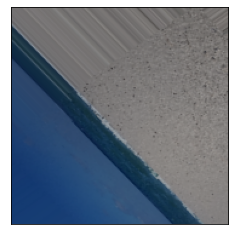

[정답!] "공천포구" 을 "공천포구" 라고 99.35% 확률로 예측하였습니다. 


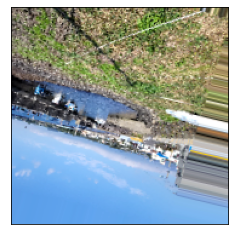

[정답!] "교래자연휴양림" 을 "교래자연휴양림" 라고 99.75% 확률로 예측하였습니다. 


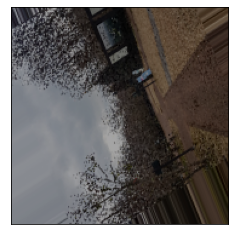

[정답!] "교래자연휴양림" 을 "교래자연휴양림" 라고 99.98% 확률로 예측하였습니다. 


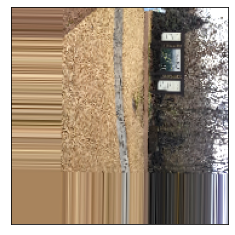

[정답!] "곽지과물해변" 을 "곽지과물해변" 라고 95.18% 확률로 예측하였습니다. 


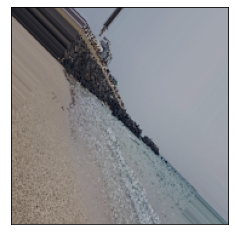

[정답!] "곽지과물해변" 을 "곽지과물해변" 라고 94.50% 확률로 예측하였습니다. 


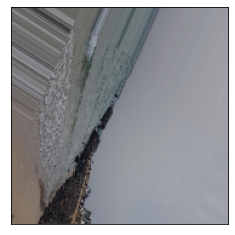

[정답!] "교래 삼다수마을" 을 "교래 삼다수마을" 라고 99.99% 확률로 예측하였습니다. 


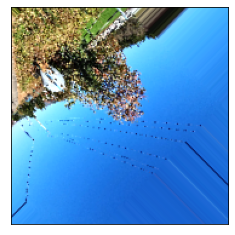

[정답!] "교래자연휴양림" 을 "교래자연휴양림" 라고 99.72% 확률로 예측하였습니다. 


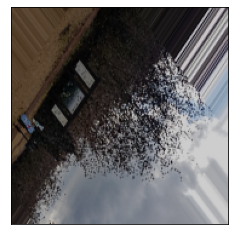

In [46]:
import numpy as np
for imgs, labels in valid_ds:
  preds = my_model.predict(imgs)
  print(imgs.shape, labels.shape, preds.shape)

  for i in range(BATCH_SIZE):
    label = np.argmax(labels[i])
    pred = np.argmax(preds[i])
    if label==pred: result='정답!'
    else: result = '오답!'
    print(f'[{result}] "{mydict[label]}" 을 "{mydict[pred]}" 라고 {preds[i][pred]*100:.2f}% 확률로 예측하였습니다. ')
    plt.xticks([]);plt.yticks([])
    plt.imshow(imgs[i])
    plt.show()
  break